## Final project Submission
Please fill out:
* Student name : Lauren Njoki
* Student pace: Self pace
* Instructor name: Brian Chacha/Lians Wanjiku

# Aviation Analysis 

### Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. 

The goal is to help our company decide which aircraft types are safest to invest in for our new aviation business venture.




### 1. Importing Libraries
Import libraries and set display/plotting options.

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

### 2. Loading the data
Loading our Data set (Aviation_Data)

In [287]:
# Load dataset
df = pd.read_csv('data\Aviation_Data.csv', low_memory=False)

# View first few rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 3. Quick data audit
Check the columns, types, missing values and basic stats so we know what to clean.

In [273]:
# Explore data

#Check information about the dataset
df.info()


#Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [274]:
#Get summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 4. Data Cleaning
**This includes:**
- Dropping unwanted columns
- Finding and drop duplicates
- Filling in missing values with mean
- Formating column data respectively

In [275]:
#Drop unwanted columns
columns_to_drop = [
    'Event.Id',
    'Investigation.Type',
    'Accident.Number',
    'Airport.Code',
    'Airport.Name',
    'FAR.Description',
    'Schedule',
    'Air.carrier',
    'Report.Status',
    'Publication.Date',
    'Latitude','Longitude','Aircraft.Category','Registration.Number'
]

df = df.drop(columns=columns_to_drop)
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [276]:
#Find the total number of duplicate rows
df.duplicated().sum()


1493

In [277]:
#Drop duplicate rows
df.drop_duplicates(inplace=True)


In [278]:
#confirm duplicates are dropped
df.duplicated().sum()

0

In [279]:
df.isnull().sum()

Event.Date                    1
Location                     53
Country                     227
Injury.Severity             999
Aircraft.damage            3192
Make                         64
Model                        93
Amateur.Built               103
Number.of.Engines          6081
Engine.Type                7075
Purpose.of.flight          6190
Total.Fatal.Injuries      11399
Total.Serious.Injuries    12504
Total.Minor.Injuries      11927
Total.Uninjured            5909
Weather.Condition          4491
Broad.phase.of.flight     27159
dtype: int64

In [280]:
#Fill missing numeric values with the mean of each column

continous_col = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
df[continous_col]=df[continous_col].fillna(df[continous_col].mean())

#df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean())
#df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mean())
#df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean())
#df['Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].mean())
#df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean())

# Convert date
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Month'] = df['Event.Date'].dt.month
df['Year'] = df['Event.Date'].dt.year
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Month,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,UNK,Cruise,10.0,1948.0
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.000000,Reciprocating,Personal,4.0,0.000000,0.000000,0.000000,UNK,Unknown,7.0,1962.0
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.000000,Reciprocating,Personal,3.0,0.279892,0.357061,5.318159,IMC,Cruise,8.0,1974.0
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,IMC,Cruise,6.0,1977.0
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.146556,NaN,Personal,1.0,2.000000,0.357061,0.000000,VMC,Approach,8.0,1979.0


In [281]:

#Drop any remaining rows with missing values
df=df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58769 entries, 0 to 63911
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              58769 non-null  datetime64[ns]
 1   Location                58769 non-null  object        
 2   Country                 58769 non-null  object        
 3   Injury.Severity         58769 non-null  object        
 4   Aircraft.damage         58769 non-null  object        
 5   Make                    58769 non-null  object        
 6   Model                   58769 non-null  object        
 7   Amateur.Built           58769 non-null  object        
 8   Number.of.Engines       58769 non-null  float64       
 9   Engine.Type             58769 non-null  object        
 10  Purpose.of.flight       58769 non-null  object        
 11  Total.Fatal.Injuries    58769 non-null  float64       
 12  Total.Serious.Injuries  58769 non-null  float6

## Data Visualization

With the use of graphs ,we get to see,understand and interprate the data.

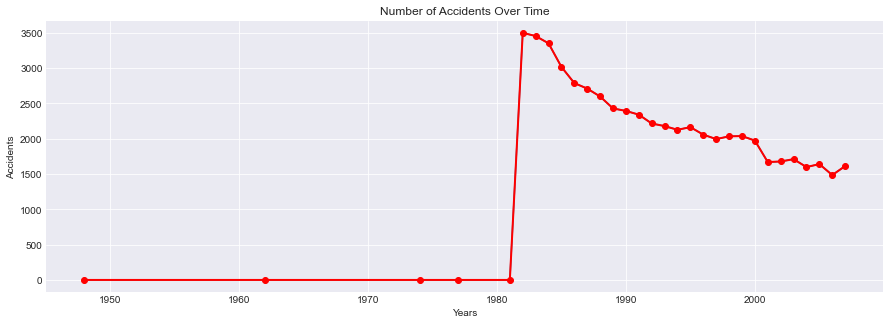

In [282]:
# Accidents per month
accidents_per_Year = df['Year'].value_counts().sort_index()
accidents_per_Year.plot(kind='line', figsize=(15,5))

x=accidents_per_Year.index
y=accidents_per_Year.values
plt.plot(x,y, marker='o',color='red',linewidth=2)
plt.title("Number of Accidents Over Time")
plt.xlabel("Years")
plt.ylabel("Accidents")
plt.show()

### Observation

From the graph above it is clear that the number of accidents that happened over time has been gradualling dropping although there has been a slight increase in the year 2020.

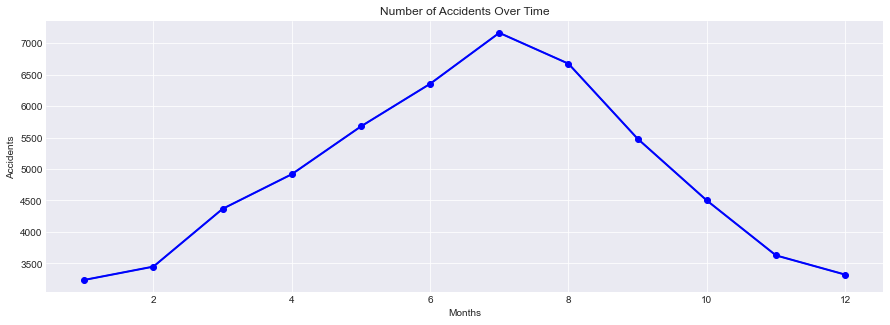

In [283]:
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='line', figsize=(15,5))

x=accidents_per_month.index
y=accidents_per_month.values
plt.plot(x,y, marker='o',color='blue',linewidth=2)
plt.title("Number of Accidents Over Time")
plt.xlabel("Months")
plt.ylabel("Accidents")
plt.show()

### Observation

From the graph above it is clear that the most acciidents happened in the month of July.

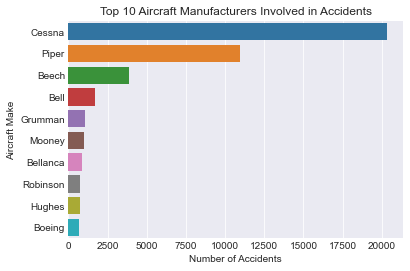

In [284]:
# Top 10 aircraft manufacturers
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 Aircraft Manufacturers Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.show()

### Observation

From the graph above shows the Aircraft Manufacters with the least amount of accidents.

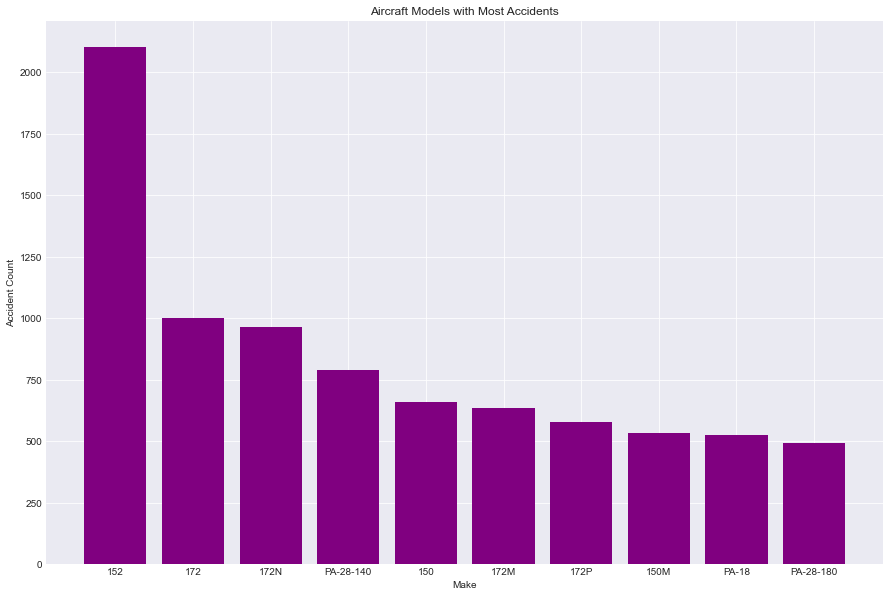

In [285]:
# Top 10 aircraft models with most accidents
Make_counts=df['Model'].value_counts()

top_10=Make_counts.head(10)


plt.figure(figsize=(15,10))

plt.bar(top_10.index,top_10.values,color=['purple'])

plt.title('Aircraft Models with Most Accidents')

plt.xlabel('Make')

plt.ylabel('Accident Count')

plt.show()


### Observation

From the graph above shows the Aircraft Model with the most accidents is 152

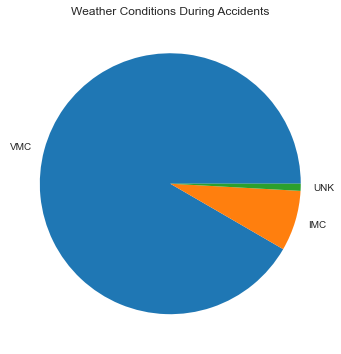

In [286]:
# Weather condition breakdown
df['Weather.Condition'].value_counts().plot(kind='pie', figsize=(6,6))
plt.title("Weather Conditions During Accidents")
plt.ylabel("")
plt.show()


### Observation

From the graph above shows the the type of weather condition that most accidents happened.

##

# Recommendations

- Aircraft Make: Boeing aircraft have recorded relatively fewer accidents, suggesting they are more reliable and safer for investment. In contrast, Cessna models show a significantly higher number of accidents and may pose greater operational risk.

- Aircraft Model: The PA-21-180 model appears to be among the most reliable, with the fewest reported accidents. Models such as the Cessna 152 have higher accident frequencies and should be approached with caution.

- Seasonality (Month): Accident occurrences peak in July, possibly due to increased flight activity or weather-related factors. It is advisable to schedule maintenance checks and safety audits before and after this period to minimize risks.

- Weather Conditions: Interestingly, most accidents occur under clear weather and high visibility conditions. This suggests that human error, rather than adverse weather, could be a major contributing factor. Enhanced pilot training and stricter safety procedures are recommended.